In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import _pickle as pickle
from os import listdir
from os.path import join, isfile

import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
from keras import backend as K
K.set_session(session)

from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.regularizers import l2

Using TensorFlow backend.


In [2]:
# Load labels and split to train/val
NUM_CLASSES = 120
SEED = 2914
np.random.seed(seed=SEED)
data_dir = '../data'
labels = pd.read_csv(join(data_dir, 'labels.csv'))
l_val = labels.groupby('breed').apply(pd.DataFrame.sample, frac=0.2).reset_index(drop=True)
l_tr = labels.loc[~labels['id'].isin(l_val['id'])]
sample_submission = pd.read_csv(join(data_dir, 'sample_submission.csv'))
print('Train:', len(listdir(join(data_dir, 'train'))), '=', len(l_tr)+len(l_val), '=', len(l_val), '+', len(l_tr))
print('Test:', len(listdir(join(data_dir, 'test'))), '=', len(sample_submission))

print("We should have {} clasess and the train data has {} classes."
      .format(NUM_CLASSES, len(l_tr.groupby('breed').count())))

l_tr_index = {label:i for i,label in enumerate(np.unique(l_tr.breed))}
l_tr_temp = [l_tr_index[label] for label in l_tr.breed]
l_val_temp = [l_tr_index[label] for label in l_val.breed]
y_tr = to_categorical(l_tr_temp ,num_classes=120)
y_val = to_categorical(l_val_temp ,num_classes=120)

print('y_tr shape: {}'.format(y_tr.shape))
print('y_val shape: {}'.format(y_val.shape))

Train: 10225 = 10222 = 2037 + 8185
Test: 10357 = 10357
We should have 120 clasess and the train data has 120 classes.
y_tr shape: (8185, 120)
y_val shape: (2037, 120)


In [3]:
filename = data_dir + '//train//xs_bf_inception_v3'
print('Loading from {}'.format(filename))
with open(filename, 'rb') as fp:
    xs_bf_inception = pickle.load(fp)
print('xs_bf_inception shape: {} size: {:,}'.format(xs_bf_inception.shape, xs_bf_inception.size))

filename = data_dir + '//train//xs_bf_xception'
print('Loading from {}'.format(filename))
with open(filename, 'rb') as fp:
    xs_bf_xception = pickle.load(fp)
print('xs_bf_xception shape: {} size: {:,}'.format(xs_bf_xception.shape, xs_bf_xception.size))

filename = data_dir + '//train//xs_bf_vgg16'
print('Loading from {}'.format(filename))
with open(filename, 'rb') as fp:
    xs_bf_vgg16 = pickle.load(fp)
print('xs_bf_vgg16 shape: {} size: {:,}'.format(xs_bf_vgg16.shape, xs_bf_vgg16.size))

Loading from ../data//train//xs_bf_inception_v3
xs_bf_inception shape: (10222, 2049) size: 20,944,878
Loading from ../data//train//xs_bf_xception
xs_bf_xception shape: (10222, 2049) size: 20,944,878
Loading from ../data//train//xs_bf_vgg16
xs_bf_vgg16 shape: (10222, 513) size: 5,243,886


In [5]:
# Split to train/val sets

# Inception
x_tr_inc = np.zeros((len(l_tr), xs_bf_inception.shape[1]-1), dtype='float32')
for i, img_id in enumerate(l_tr['id']):
    x_tr_inc[i] = xs_bf_inception[xs_bf_inception.id == img_id].values[0][1:]
print('Inception train bottleneck features shape: {} size: {:,}'.format(x_tr_inc.shape, x_tr_inc.size))

x_val_inc = np.zeros((len(l_val), xs_bf_inception.shape[1]-1), dtype='float32')
for i, img_id in enumerate(l_val['id']):
    x_val_inc[i] = xs_bf_inception[xs_bf_inception.id == img_id].values[0][1:]
print('Inception validation bottleneck features shape: {} size: {:,}'.format(x_val_inc.shape, x_val_inc.size))
xs_bf_inception = None

# Xception
x_tr_xc = np.zeros((len(l_tr), xs_bf_xception.shape[1]-1), dtype='float32')
for i, img_id in enumerate(l_tr['id']):
    x_tr_xc[i] = xs_bf_xception[xs_bf_xception.id == img_id].values[0][1:]
print('Xception train bottleneck features shape: {} size: {:,}'.format(x_tr_xc.shape, x_tr_xc.size))

x_val_xc = np.zeros((len(l_val), xs_bf_xception.shape[1]-1), dtype='float32')
for i, img_id in enumerate(l_val['id']):
    x_val_xc[i] = xs_bf_xception[xs_bf_xception.id == img_id].values[0][1:]
print('Xception validation bottleneck features shape: {} size: {:,}'.format(x_val_xc.shape, x_val_xc.size))
xs_bf_xception = None

# VGG16
x_tr_vgg = np.zeros((len(l_tr), xs_bf_vgg16.shape[1]-1), dtype='float32')
for i, img_id in enumerate(l_tr['id']):
    x_tr_vgg[i] = xs_bf_vgg16[xs_bf_vgg16.id == img_id].values[0][1:]
print('VGG16 train bottleneck features shape: {} size: {:,}'.format(x_tr_vgg.shape, x_tr_vgg.size))

x_val_vgg = np.zeros((len(l_val), xs_bf_vgg16.shape[1]-1), dtype='float32')
for i, img_id in enumerate(l_val['id']):
    x_val_vgg[i] = xs_bf_vgg16[xs_bf_vgg16.id == img_id].values[0][1:]
print('VGG16 validation bottleneck features shape: {} size: {:,}'.format(x_val_vgg.shape, x_val_vgg.size))
xs_bf_vgg16 = None

Inception train bottleneck features shape: (8185, 2048) size: 16,762,880
Inception validation bottleneck features shape: (2037, 2048) size: 4,171,776
Xception train bottleneck features shape: (8185, 2048) size: 16,762,880
Xception validation bottleneck features shape: (2037, 2048) size: 4,171,776
VGG16 train bottleneck features shape: (8185, 512) size: 4,190,720
VGG16 validation bottleneck features shape: (2037, 512) size: 1,042,944


In [10]:
# Setup model
model = Sequential()

model.add(Dense(100, input_shape=(2048,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
          
model.add(Dense(120, activation='softmax', kernel_regularizer=keras.regularizers.l2(1e-5)))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


Train on 8185 samples, validate on 2037 samples
Epoch 1/50
8185/8185 [==============================] - 4s - loss: 15.8934 - acc: 0.0089 - val_loss: 13.1069 - val_acc: 0.0059
Epoch 2/50
8185/8185 [==============================] - 4s - loss: 15.9317 - acc: 0.0072 - val_loss: 15.2942 - val_acc: 0.0069
Epoch 3/50
8185/8185 [==============================] - 4s - loss: 15.9199 - acc: 0.0093 - val_loss: 14.7075 - val_acc: 0.0088
Epoch 4/50
8185/8185 [==============================] - 4s - loss: 15.9410 - acc: 0.0078 - val_loss: 14.7867 - val_acc: 0.0069
Epoch 5/50
8185/8185 [==============================] - 4s - loss: 15.9668 - acc: 0.0070 - val_loss: 14.7557 - val_acc: 0.0074
Epoch 6/50
8185/8185 [==============================] - 4s - loss: 15.9185 - acc: 0.0093 - val_loss: 14.6497 - val_acc: 0.0128
Epoch 7/50
8185/8185 [==============================] - 4s - loss: 15.9224 - acc: 0.0094 - val_loss: 15.2251 - val_acc: 0.0113
Epoch 8/50
8185/8185 [==============================] - 4s - lo

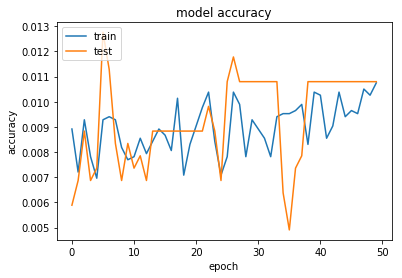

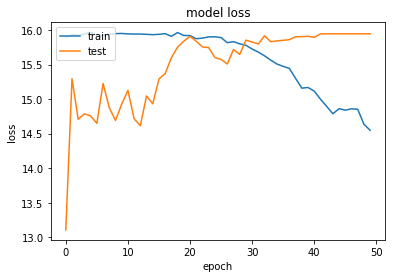

In [11]:
# Train
history = model.fit(x_tr, y_tr,
              batch_size=64,
              epochs=50,
              verbose=1,
              validation_data=(x_val, y_val),
              shuffle=True)

scores = model.evaluate(x_val, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 8185 samples, validate on 2037 samples
Epoch 1/50
8185/8185 [==============================] - 4s - loss: 14.2519 - acc: 0.0103 - val_loss: 15.9440 - val_acc: 0.0108
Epoch 2/50
8185/8185 [==============================] - 4s - loss: 14.0621 - acc: 0.0101 - val_loss: 15.9440 - val_acc: 0.0108
Epoch 3/50
8185/8185 [==============================] - 4s - loss: 14.0668 - acc: 0.0101 - val_loss: 15.9440 - val_acc: 0.0108
Epoch 4/50
8185/8185 [==============================] - 4s - loss: 14.2261 - acc: 0.0076 - val_loss: 15.9440 - val_acc: 0.0108
Epoch 5/50
8185/8185 [==============================] - 4s - loss: 13.9142 - acc: 0.0097 - val_loss: 15.9440 - val_acc: 0.0108
Epoch 6/50
8185/8185 [==============================] - 4s - loss: 13.7540 - acc: 0.0101 - val_loss: 15.9440 - val_acc: 0.0108
Epoch 7/50
8185/8185 [==============================] - 4s - loss: 13.4759 - acc: 0.0122 - val_loss: 15.9440 - val_acc: 0.0108
Epoch 8/50
8185/8185 [==============================] - 4s - lo

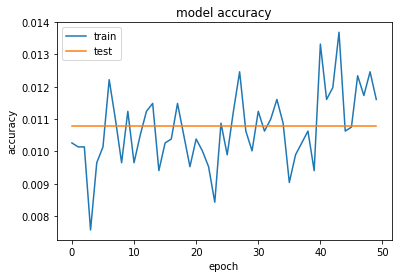

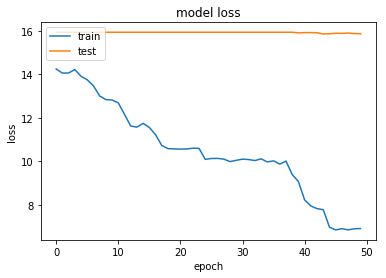

In [12]:
# Train
history2 = model.fit(x_tr, y_tr,
              batch_size=64,
              epochs=50,
              verbose=1,
              validation_data=(x_val, y_val),
              shuffle=True)

scores = model.evaluate(x_val, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# summarize history for accuracy
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 8185 samples, validate on 2037 samples
Epoch 1/50
8185/8185 [==============================] - 5s - loss: 6.8827 - acc: 0.0120 - val_loss: 15.8507 - val_acc: 0.0108
Epoch 2/50
8185/8185 [==============================] - 4s - loss: 6.8512 - acc: 0.0121 - val_loss: 15.7369 - val_acc: 0.0108
Epoch 3/50
8185/8185 [==============================] - 4s - loss: 6.0866 - acc: 0.0116 - val_loss: 15.2464 - val_acc: 0.0108
Epoch 4/50
8185/8185 [==============================] - 4s - loss: 5.4725 - acc: 0.0133 - val_loss: 4.7763 - val_acc: 0.0123
Epoch 5/50
8185/8185 [==============================] - 4s - loss: 4.7766 - acc: 0.0123 - val_loss: 4.7763 - val_acc: 0.0123
Epoch 6/50
8185/8185 [==============================] - 4s - loss: 4.7765 - acc: 0.0123 - val_loss: 4.7762 - val_acc: 0.0123
Epoch 7/50
8185/8185 [==============================] - 4s - loss: 4.7766 - acc: 0.0123 - val_loss: 4.7762 - val_acc: 0.0123
Epoch 8/50
8185/8185 [==============================] - 4s - loss: 4.7768 

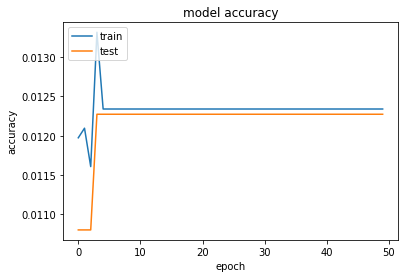

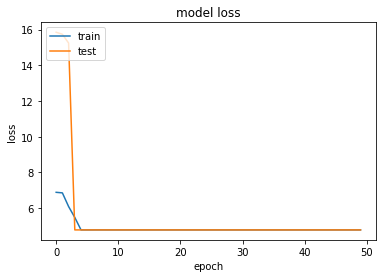

In [13]:
# Train
history3 = model.fit(x_tr, y_tr,
              batch_size=64,
              epochs=50,
              verbose=1,
              validation_data=(x_val, y_val),
              shuffle=True)

scores = model.evaluate(x_val, y_val, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()